# Поиск двух лучших рынков для рекламы для продукта электронное обучение

Анализ данных опросов [Git](https://github.com/freeCodeCamp/2017-new-coder-survey) новых разработчиков для определения лучшего рынка для рекламы.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
survey_data=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
survey_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_data["JobRoleInterest"].value_counts(normalize=True).sort_values(ascending=False).head(15)

Full-Stack Web Developer                                                       0.117706
  Front-End Web Developer                                                      0.064359
  Data Scientist                                                               0.021739
Back-End Web Developer                                                         0.020309
  Mobile Developer                                                             0.016733
Game Developer                                                                 0.016304
Information Security                                                           0.013158
Full-Stack Web Developer,   Front-End Web Developer                            0.009153
  Front-End Web Developer, Full-Stack Web Developer                            0.008009
  Product Manager                                                              0.007866
Data Engineer                                                                  0.007580
  User Experience Designer      

Большая часть интересуется вэб разработкой-11%, след data sciense - 2%,мобильная разработка и гейм дизайн - 1,6%

In [5]:
interests_no_nulls = survey_data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')
nf=splitted_interests.apply(lambda x: len(x))
nf.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Только 31,7% участников понимают, где хотят работать. Остальные респонденты имеют смешнные интересы. Тк у ислледуемой компании широкая линейка курсов, факт, что новые клиенты имеют смешынный интерес хорош.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


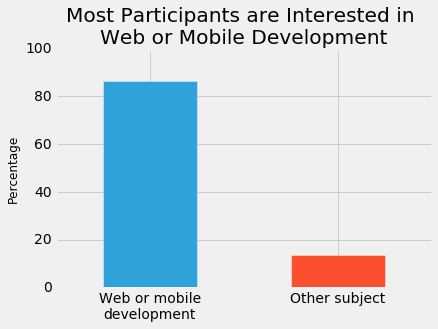

In [6]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development') # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

Оказывается, большинство людей в этом опросе (примерно 86%) заинтересованы в веб-или мобильной разработке. Эти цифры дают нам веские основания считать данную выборку репрезентативной для интересующей нас популяции. Мы хотим рекламировать наши курсы для людей, заинтересованных во всех видах программных ниш, но в основном веб-и мобильных разработок.

In [7]:
fcc_good = survey_data[survey_data['JobRoleInterest'].notnull()].copy()
cl=fcc_good["CountryLive"].value_counts(normalize=False).sort_values(ascending=False).head(15)

In [8]:
cln=fcc_good["CountryLive"].value_counts(normalize=True).sort_values(ascending=False).head(15)*100

In [9]:
pd.DataFrame(data = {'Absolute frequency': cl, 
                     'Percentage': cln}
            )

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45.7% наших потенциальных клиентов находятся в США, и это определенно кажется свмым интересным рынком. Индия имеет вторую плотность клиентов, но это всего лишь 7,7%, что не слишком далеко от Великобритании (4,6%) или Канады (3,8%).

Это полезная информация, но нужно пойти дальше и выяснить, сколько денег люди на самом деле готовы потратить на обучение. *Реклама на рынках высокой плотности, где большинство людей готовы учиться только бесплатно, вряд ли будет для прибыльной.*

# Сколько клиенты тратят на обучение

In [10]:
# Replace 0s with 1s to avoid division by 0
fcc_good['MonthsProgramming'].replace(0,1, inplace = True)

# New column for the amount of money each student spends each month
fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['money_per_month'].isnull().sum()

675

In [11]:
# Keep only the rows with non-nulls in the `money_per_month` column 
fcc_good = fcc_good[fcc_good['money_per_month'].notnull()]

In [12]:
fcc_good['money_per_month'].isnull().value_counts()

False    6317
Name: money_per_month, dtype: int64

In [13]:
fcc_good[fcc_good['money_per_month']==0]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
11,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
31,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
35,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
41,18.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
43,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
52,21.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [14]:

# Remove the rows with null values in 'CountryLive'
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

# Frequency table to check if we still have enough data
fcc_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [15]:
fcc_good['money_per_month']

1           13.333333
2          200.000000
3            0.000000
4            0.000000
6            0.000000
9            5.555556
11           0.000000
15           0.000000
16          16.666667
18          35.714286
19          17.857143
21         100.000000
22         285.714286
23         100.000000
28           2.416667
30          66.666667
31           0.000000
32         100.000000
33          83.333333
35           0.000000
40          25.000000
41           0.000000
42          50.000000
43           0.000000
52           0.000000
55           0.000000
58           0.000000
63          16.666667
64          50.000000
66           2.777778
             ...     
18070        0.055556
18071        7.500000
18073       16.666667
18078      500.000000
18080       25.000000
18088      182.000000
18089        0.000000
18090        0.000000
18093       27.777778
18097        0.000000
18098        1.222222
18099     1000.000000
18107      275.000000
18111      200.000000
18112     

In [16]:
countries_mean = fcc_good.groupby('CountryLive').mean().loc[["United States of America","India","United Kingdom","Canada"],"money_per_month"]
countries_mode = fcc_good.groupby('CountryLive')["money_per_month"].apply(lambda x: x.mode()).loc[["United States of America","India","United Kingdom","Canada"]].iloc[0]
countries_median = fcc_good.groupby('CountryLive').median().loc[["United States of America","India","United Kingdom","Canada"],"money_per_month"]


In [17]:
countries_mode

0.0

In [18]:
countries_median

CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: money_per_month, dtype: float64

In [19]:
pd.DataFrame(data = {'Absolute frequency': cl.head(4), 
                     'Percentage': cln.head(4),
                    'MoneyForLearning_mean':countries_mean,
                 'MoneyForLearning_median':countries_median,
                'MoneyForLearning_mode':countries_mode}
            )

,Absolute frequency,MoneyForLearning_mean,MoneyForLearning_median,MoneyForLearning_mode,Percentage
CountryLive,,,,,
United States of America,3125,227.997996,3.333333,0.0,45.700497
India,528,135.100982,0.000000,0.0,7.721556
United Kingdom,315,45.534443,0.000000,0.0,4.606610
Canada,260,113.510961,0.000000,0.0,3.802281


Больше всего в среднем тратят на обучение в США.Траты в Индии сравнимы с Канадой.Самый низкий показатель в Британии. Это кажется странным. Возможно в Британии и др есть аутлайеры. Согласно ряду социо-экономических метрик (например [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP) можно ожидать, что люди в Канаде и Британии тратят больше, чем в Индии

In [20]:
only_4=fcc_good[fcc_good['CountryLive'].str.contains( 'United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


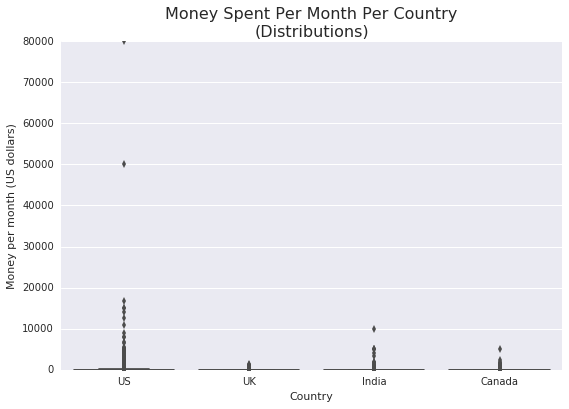

In [21]:
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Есть два выброса в США, нужно отфильтровать < 20000

In [22]:
small20000=only_4.loc[only_4["money_per_month"]<20000]

In [23]:
countries_mean_20000 = small20000.groupby('CountryLive').mean().loc[["United States of America","India","United Kingdom","Canada"],"money_per_month"]


In [24]:
countries_mean_20000

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

In [25]:
countries_mean

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

После удаления выбросов **средняя цена в США снизилась до 183$**, оно также продолжает занимать лидирующие позиции

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


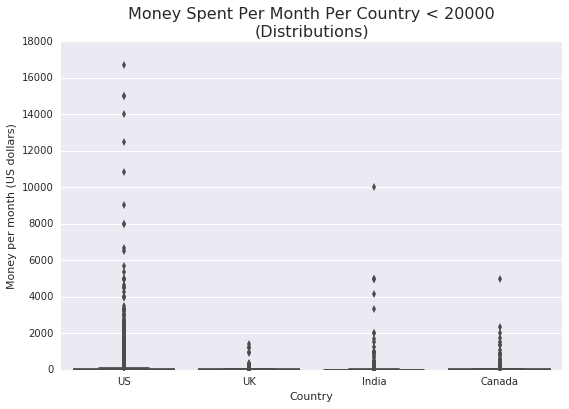

In [26]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = small20000)
plt.title('Money Spent Per Month Per Country < 20000\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [27]:
ind_outliers = small20000[(small20000['CountryLive'] == 'India') & (small20000["money_per_month"]>2500)]
ind_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


Ни один из клиентов не посещал лагерь. Возможно в сумму в ответ они включили затраты на университет. Изолируем эти данные

In [28]:
small20000 = small20000.drop(ind_outliers.index)

In [29]:

us_outliers = small20000[(small20000['CountryLive'] == 'United States of America') & (only_4["money_per_month"]>6000)]
us_outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


часть клиентов посещала лагерь. Это объясняет большие затраты на обучение. Нужно удалить тех, кто не посещал лагерь с суммой >5000, а также тех, кто на момент опроса программирует меньше 3х месяцев после обучения.Скорее всего, они заплатили большую сумму денег за лагерь, который должен был длиться несколько месяцев, поэтому сумма денег, потраченная в месяц, нереальна и должна быть значительно ниже (потому что они, вероятно, ничего не потратили в течение следующих нескольких месяцев после опроса). Как следствие, удалим выбросы.

In [30]:
us_outliers = small20000[(small20000['CountryLive'] == 'United States of America') & (small20000["money_per_month"]>6000)&
(small20000['AttendedBootcamp'] == 0) |
    (small20000['MonthsProgramming'] <= 3)]
small5000 = small20000.drop(us_outliers.index)

В Канаде также есть выброс. Рассмотрим его подробнее.

In [31]:
can_outliers=small5000[(small5000['CountryLive'] == 'Canada') & (small5000["money_per_month"]>4000)]
can_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month


Здесь ситуация аналогична некоторым респондентам из США - этот участник программировал не более двух месяцев, на момент опроса. Похоже, что он сначала заплатил большую сумму денег, чтобы записаться в лагерь, а затем, вероятно, ничего не потратил в течение следующих нескольких месяцев после опроса.Удалим этот выброс.

In [32]:
small45000 = small5000.drop(can_outliers.index)
small45000

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
16,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.666667
18,46.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.714286
19,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.857143
22,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,285.714286
28,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.416667
32,54.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
33,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.333333


Пересчитаем теперь средние затраты на обучение среди стран

In [33]:
countries_mean_4500 = small45000.groupby('CountryLive').mean().loc[["United States of America","India","United Kingdom","Canada"],"money_per_month"]
countries_mode_4500 = small45000.groupby('CountryLive')["money_per_month"].apply(lambda x: x.mode()).loc[["United States of America","India","United Kingdom","Canada"]].iloc[0]
countries_median_4500 = small45000.groupby('CountryLive').median().loc[["United States of America","India","United Kingdom","Canada"],"money_per_month"]


In [34]:
countries_mean_4500

CountryLive
United States of America    139.300544
India                        42.702574
United Kingdom               45.850150
Canada                      102.823423
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


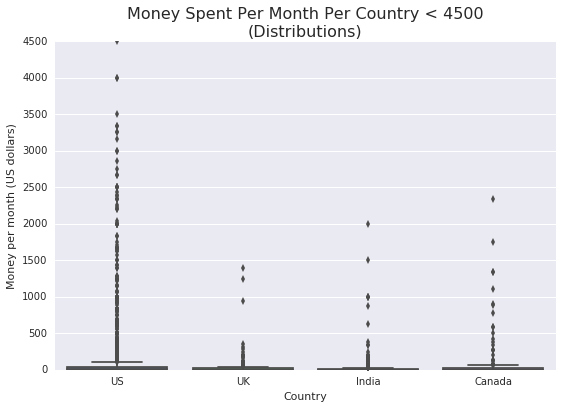

In [35]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = small45000)
plt.title('Money Spent Per Month Per Country < 4500\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

# Выбор двух лучших рынков для рекламы¶

In [36]:
pd.DataFrame(data = {'Absolute frequency': cl.head(4), 
                     'Percentage': cln.head(4),
                    'MoneyForLearning_mean':countries_mean_4500,
                    'MoneyForLearning_median':countries_median_4500,
                    'MoneyForLearning_mode':countries_mode_4500}
            )

,Absolute frequency,MoneyForLearning_mean,MoneyForLearning_median,MoneyForLearning_mode,Percentage
CountryLive,,,,,
United States of America,3125,139.300544,5.833333,0.0,45.700497
India,528,42.702574,0.000000,0.0,7.721556
United Kingdom,315,45.850150,1.666667,0.0,4.606610
Canada,260,102.823423,2.500000,0.0,3.802281


# Выводы

**Лучшая страна для инвестиций в рекламу - США.**

**Нельзя на основе данных анализа сделать выбор между Индией и Канадой.** В Канаде больше ср затраты на обучение, но у мы в данных избавлялись от выбросов, тогда как в Индии большее число потенциальных клиентов.

**Можно определить несколько маркетинговых стратегий:**

*Реклама в США, Индии и Канаде, разбивая рекламный бюджет на различные комбинации:*

60% для США, 25% для Индии, 15% для Канады.
50% для США, 30% для Индии, 20% для Канады; и т.п.


*Реклама только в США и Индии, или в США и Канаде. Опять же, имеет смысл разделить рекламный бюджет неравномерно:*

70% для США и 30% для Индии.
65% для США и 35% для Канады; и т.п.

*Реклама только в США*